# Calc_PDV speedup

After time_profiling the different functions of grid.py, it was found that the main bottleneck was under calc_PDV, more specifically to the call to scipy's spline function, which took up almost more than 50% of the compuation time. We then proceeded to speed up the method by doing the following:

- replacing every instance of the spline evaluation `scipy.interpolate.splev()` with linear interpolation `scipy.interpolate.interp1d()` 
- converting interpolation values to log space

The following notebook was created to measure the results of the changes using the following criteria:
- average speedup
- accuracy

### Importing specific packages

`profile_linear.py` contains the following:
- `run_spline()` for running the original `grid.update()` with spline interpolation
- `run_linear()` for running `grid.update()` with linear interpolation
- `run_linear_log10()` for running `grid.update()` with linear interpolation AND log10 space conversion

The rest of the packages are for statistical plotting and analysis

In [68]:
from profile_linear import *
import matplotlib.pyplot as plt
import numpy as np
import statistics
import seaborn
from scipy.stats import norm


## Analayzing the data


### Speed-up

`profile_linear.py` contains the follow time averages defined as `datetime.timedelta`

- `splineAvg` for spline time average 
- `linearAvg` for linear time average
- `linearLogAvg` for linear time w/ logspace conversion time average

In [ ]:
print(splineAvg)
print(linearAvg)
print(linearLogAvg)

### Accuracy

Importing the data from `profile_linear.py`, we have `relative_acc_array` which is a `np.array` that is derived from the following calculation for relative accuracy:

\begin{align}
\frac{|spline - linear|}{spline}
\end{align}

In [70]:
mainData = relative_acc_array.flatten()
mainData.size

700000

Plotting `mainData` on a histogram yields the following result

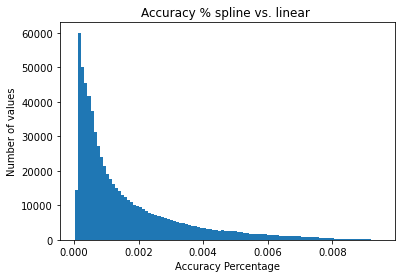

In [66]:
fig = plt.figure()
fig.patch.set_facecolor('white')
plot = plt.hist(mainData, bins=100)

plt.ylabel("Number of values")
plt.xlabel("Accuracy Percentage")
plt.title("Accuracy % spline vs. linear ")
plt.savefig("Accuracy_spline_linear_.png")


And calculating other values with accuracies

In [67]:

mean = statistics.mean(mainData)
stdev = statistics.stdev(mainData)
median = statistics.median(mainData)

print("MEAN:", mean)
print("STDEV:", stdev)
print("MEDIAN:", median)
print("MINIMUM:", min(mainData))
print("MAXIMUM:", max(mainData))

MEAN: 0.0016211265540896714
STDEV: 0.0016785839647129389
MEDIAN: 0.0009653076914118014
MINIMUM: 3.490627605245515e-05
MAXIMUM: 0.009467970353336382
